<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_3_Petrol_Consumption_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary :**                             
1) Importing Libraries                                 
2) Loading Dataset                                
3) Data PreProcessing                                           
4) EDA (Exploratory Data Analysis)                                   
5) Train and Test Split                                      
6) Standard Scaler                                 
7) Modelling                                       
8) Making Prediction                                  
9) Compare Actual and Predicted Scores                                     
10) Evaluation Metrics                                                    

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**2) Loading Dataset**

In [2]:
petrol_cons_data = pd.read_csv("/content/petrol_consumption.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [3]:
petrol_cons_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


2) Last Five Rows of DataSet

In [4]:
petrol_cons_data.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


3) Shape of DataSet

In [5]:
petrol_cons_data.shape
print("Number of Rows: ",petrol_cons_data.shape[0])
print("Number of Columns: ",petrol_cons_data.shape[1])

Number of Rows:  48
Number of Columns:  5


4) data Types

In [6]:
petrol_cons_data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

5) Getting Information of DataSet

In [7]:
petrol_cons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


6) Checking Missing Values of DataSet

In [8]:
petrol_cons_data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

7) Droping Duplicates Values of Dataset

In [9]:
petrol_cons_data = petrol_cons_data.drop_duplicates()

8) Statistical Measures

In [10]:
petrol_cons_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


9)  IQR (Inter Quantile Range)    

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)         


Petrol_tax

In [11]:
IQR = petrol_cons_data.Petrol_tax.quantile(0.75) - petrol_cons_data.Petrol_tax.quantile(0.25)
Upper_Threshold = petrol_cons_data.Petrol_tax.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = petrol_cons_data.Petrol_tax.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  9.8125
Lower_Threshold :  5.3125


Average_income

In [12]:
IQR = petrol_cons_data.Average_income.quantile(0.75) - petrol_cons_data.Average_income.quantile(0.25)
Upper_Threshold = petrol_cons_data.Average_income.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = petrol_cons_data.Average_income.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  5838.375
Lower_Threshold :  2479.375


Paved_Highways

In [13]:
IQR = petrol_cons_data.Paved_Highways.quantile(0.75) - petrol_cons_data.Paved_Highways.quantile(0.25)
Upper_Threshold = petrol_cons_data.Paved_Highways.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = petrol_cons_data.Paved_Highways.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  13224.625
Lower_Threshold :  -2958.375


**4) EDA (Exploratory Data Analysis)**

Petrol_tax

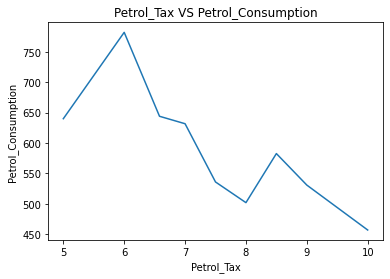

In [14]:
#petrol_cons_data.plot(x="Petrol_tax",y="Petrol_Consumption",style="o")
petrol_cons_data.groupby("Petrol_tax")["Petrol_Consumption"].mean().plot()
plt.title("Petrol_Tax VS Petrol_Consumption")
plt.xlabel("Petrol_Tax")
plt.ylabel("Petrol_Consumption")
plt.show()

petrol_tax -> Correlation

In [15]:
petrol_cons_data[["Petrol_tax","Petrol_Consumption"]].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


Average_income

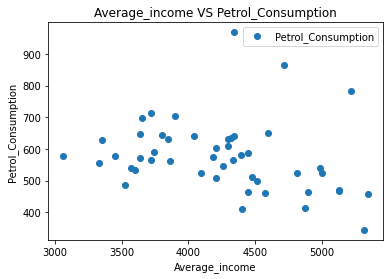

In [16]:
petrol_cons_data.plot(x="Average_income",y="Petrol_Consumption",style="o")
plt.title("Average_income VS Petrol_Consumption")
plt.xlabel("Average_income")
plt.ylabel("Petrol_Consumption")
plt.show()

Average_income -> Correlation

In [17]:
petrol_cons_data[["Average_income","Petrol_Consumption"]].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


Paved_Highways

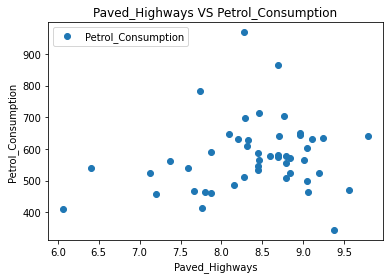

In [18]:
petrol_cons_data["Transformed"] = np.log(petrol_cons_data["Paved_Highways"])
petrol_cons_data.plot(x="Transformed",y="Petrol_Consumption",style="o")
plt.title("Paved_Highways VS Petrol_Consumption")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol_Consumption")
plt.show()

Paved_Highways -> Correlation

In [19]:
petrol_cons_data[["Transformed","Petrol_Consumption"]].corr()

,Transformed,Petrol_Consumption
Transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


Population_Driver_licence(%)

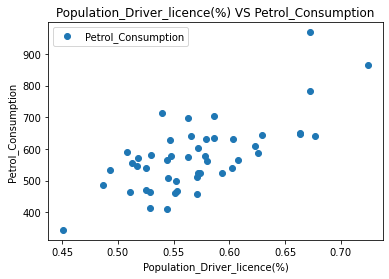

In [20]:
petrol_cons_data.plot(x="Population_Driver_licence(%)",y="Petrol_Consumption",style="o")
plt.title("Population_Driver_licence(%) VS Petrol_Consumption")
plt.xlabel("Population_Driver_licence(%)")
plt.ylabel("Petrol_Consumption")
plt.show()

Population_Driver_licence(%) -> Correlation

In [21]:
petrol_cons_data[["Population_Driver_licence(%)","Petrol_Consumption"]].corr()


,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


**5) Train and Test Split**

In [44]:
X = petrol_cons_data[["Petrol_tax","Average_income","Population_Driver_licence(%)"]]
y = petrol_cons_data["Petrol_Consumption"]

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25 ,random_state = 7)

**6) Standard Scaler**

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.86131657, -0.01147182, -0.49496696],
       [-0.86131657,  0.17487527,  0.27083098],
       [ 1.5630303 ,  1.146902  , -1.13001892],
       [-3.28566343, -0.28343785, -0.10272899],
       [-0.86131657,  0.39479842,  1.01795093],
       [ 0.95694358,  0.60464875, -0.38289897],
       [ 1.5630303 , -0.20453412,  0.009339  ],
       [-0.86131657,  0.636546  ,  1.70903688],
       [ 0.35085687,  0.29742787, -0.77513694],
       [ 0.35085687, -1.15137881, -1.57829089],
       [ 1.5630303 , -1.02882622, -1.46622289],
       [-2.07349   ,  1.68076124,  1.87713886]])

**7) Modelling**

In [95]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**8) Making Prediction**

y = β0 + β1x1 +β2x2 +.....+ βnxn

y -> Predict Target                    
x1,x2 -> Features                        
β1,β2,βn -> Parameters                   

m -> coef_                    
c -> intercept_          



In [96]:
lin_reg.coef_

array([-3.37430268e+01, -7.25208727e-02,  1.43855409e+03])

In [97]:
lin_reg.intercept_

322.3846918110445

In [98]:
lin_reg.predict([[8.0,3571,0.572]])

array([616.32137973])

**9) Compare Actual and Predicted Scores**

In [99]:
y_pred = lin_reg.predict(X_test)
y_pred

array([565.1001711 , 616.03107185, 398.66387637, 674.54424189,
       664.07300106, 496.50179518, 544.79497828, 706.85649667,
       496.43499241, 497.16267974, 466.75695379, 708.43852743])

In [100]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred})
df

,Actual,Prediction
13,508,565.100171
15,635,616.031072
22,464,398.663876
36,640,674.544242
40,587,664.073001
24,460,496.501795
1,524,544.794978
20,649,706.856497
10,580,496.434992
34,487,497.162680


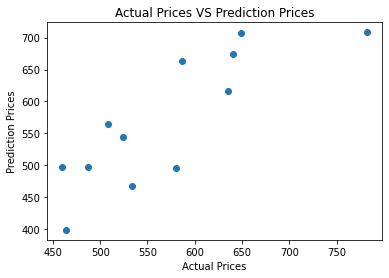

In [101]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

In [102]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred))

R2-Scores:  0.621539425074237
